In [1]:
import sys  
sys.path.insert(0, '/home/dfki/Desktop/Thesis/hyperopt')
import temp
import pickle
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import random
from hyperopt import fmin, tpe, hp, STATUS_OK,Trials,trials_from_docs
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans,SpectralClustering
import random
import pickle
import numpy as np
import scipy
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
#load trial from openml
trial_3 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/3/trial_3_new.p", "rb"))
len(trial_3.trials)

21945

In [ ]:
good_trial = temp.find_n_initial(trial=trial_3,N=4000,good=15,bad=3987)

In [ ]:
trial_31 = pickle.load(open("/home/dfki/Desktop/Thesis/openml_test/pickel_files/31/trial_31.p", "rb"))
len(trial_31.trials)

In [ ]:
good_trial = temp.remove_zero_trial(good_trial)
len(good_trial.trials)

In [ ]:
#load trials from hyperopt history
# all_trials = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/dima/3/10000it_0in_3.p", "rb"))
# trial_3 = temp.remove_zero_trial(all_trials)

In [3]:
X = temp.vector_builder(trial_3)
print(X.shape)

shape vector is (21945, 48)
(21945, 48)


In [4]:
df = pd.DataFrame(X)
for i,a in enumerate(df.isnull().sum(axis = 0)):
    print(i,a)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0


In [5]:
features = trial_3.trials[0]['misc']['vals'].keys()

df = pd.DataFrame(data=X, columns=features)
df.head()

ValueError: Shape of passed values is (21945, 48), indices imply (21945, 79)

In [6]:
X = StandardScaler().fit_transform(X)
X.shape

(21945, 48)

In [ ]:
list(np.arange(500,6500,500))

           data_index
cluster_2            
0                7072
1               14873
---------------------------------------
           data_index  cluster_2
cluster_3                       
0                7067       7067
1               14873      14873
2                   5          5
---------------------------------------
           data_index  cluster_2  cluster_3
cluster_4                                  
0                5683       5683       5683
1                1389       1389       1389
2               12540      12540      12540
3                2333       2333       2333
---------------------------------------
           data_index  cluster_2  cluster_3  cluster_4
cluster_5                                             
0               14691      14691      14691      14691
1                   5          5          5          5
2                 915        915        915        915
3                 476        476        476        476
4                5858       5858 

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_13                                                                      
0                 7430       7430       7430       7430       7430       7430   
1                  259        259        259        259        259        259   
2                    5          5          5          5          5          5   
3                  279        279        279        279        279        279   
4                  514        514        514        514        514        514   
5                 2333       2333       2333       2333       2333       2333   
6                  669        669        669        669        669        669   
7                 4571       4571       4571       4571       4571       4571   
8                  737        737        737        737        737        737   
9                  444        444        444        444        444        444   
10                 281      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_16                                                                      
0                  406        406        406        406        406        406   
1                 4415       4415       4415       4415       4415       4415   
2                 2840       2840       2840       2840       2840       2840   
3                 1124       1124       1124       1124       1124       1124   
4                 5173       5173       5173       5173       5173       5173   
5                   60         60         60         60         60         60   
6                  168        168        168        168        168        168   
7                    1          1          1          1          1          1   
8                    5          5          5          5          5          5   
9                  173        173        173        173        173        173   
10                 194      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_18                                                                      
0                 4909       4909       4909       4909       4909       4909   
1                 5740       5740       5740       5740       5740       5740   
2                  490        490        490        490        490        490   
3                  457        457        457        457        457        457   
4                  200        200        200        200        200        200   
5                   60         60         60         60         60         60   
6                  341        341        341        341        341        341   
7                    1          1          1          1          1          1   
8                  998        998        998        998        998        998   
9                   32         32         32         32         32         32   
10                1081      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_20                                                                      
0                 4694       4694       4694       4694       4694       4694   
1                 1745       1745       1745       1745       1745       1745   
2                  916        916        916        916        916        916   
3                 2273       2273       2273       2273       2273       2273   
4                  284        284        284        284        284        284   
5                    5          5          5          5          5          5   
6                    1          1          1          1          1          1   
7                 7750       7750       7750       7750       7750       7750   
8                   32         32         32         32         32         32   
9                 1055       1055       1055       1055       1055       1055   
10                 702      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_22                                                                      
0                 4526       4526       4526       4526       4526       4526   
1                  447        447        447        447        447        447   
2                 7016       7016       7016       7016       7016       7016   
3                  273        273        273        273        273        273   
4                  273        273        273        273        273        273   
5                  276        276        276        276        276        276   
6                  362        362        362        362        362        362   
7                  899        899        899        899        899        899   
8                  468        468        468        468        468        468   
9                   60         60         60         60         60         60   
10                 164      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_24                                                                      
0                  245        245        245        245        245        245   
1                 6038       6038       6038       6038       6038       6038   
2                 1056       1056       1056       1056       1056       1056   
3                  883        883        883        883        883        883   
4                 1644       1644       1644       1644       1644       1644   
5                  395        395        395        395        395        395   
6                    1          1          1          1          1          1   
7                 4526       4526       4526       4526       4526       4526   
8                   31         31         31         31         31         31   
9                 1203       1203       1203       1203       1203       1203   
10                   5      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_26                                                                      
0                   60         60         60         60         60         60   
1                 4526       4526       4526       4526       4526       4526   
2                    5          5          5          5          5          5   
3                 1215       1215       1215       1215       1215       1215   
4                  283        283        283        283        283        283   
5                  472        472        472        472        472        472   
6                  682        682        682        682        682        682   
7                  910        910        910        910        910        910   
8                   32         32         32         32         32         32   
9                  275        275        275        275        275        275   
10                 407      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_27                                                                      
0                  185        185        185        185        185        185   
1                 2936       2936       2936       2936       2936       2936   
2                  552        552        552        552        552        552   
3                   60         60         60         60         60         60   
4                 5175       5175       5175       5175       5175       5175   
5                    5          5          5          5          5          5   
6                  479        479        479        479        479        479   
7                  281        281        281        281        281        281   
8                  610        610        610        610        610        610   
9                   82         82         82         82         82         82   
10                 173      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_28                                                                      
0                 1055       1055       1055       1055       1055       1055   
1                 1693       1693       1693       1693       1693       1693   
2                  444        444        444        444        444        444   
3                   61         61         61         61         61         61   
4                 2240       2240       2240       2240       2240       2240   
5                  464        464        464        464        464        464   
6                  168        168        168        168        168        168   
7                   81         81         81         81         81         81   
8                 4722       4722       4722       4722       4722       4722   
9                  271        271        271        271        271        271   
10                  32      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_29                                                                      
0                 4448       4448       4448       4448       4448       4448   
1                  464        464        464        464        464        464   
2                 1056       1056       1056       1056       1056       1056   
3                  743        743        743        743        743        743   
4                    1          1          1          1          1          1   
5                   60         60         60         60         60         60   
6                 4423       4423       4423       4423       4423       4423   
7                  267        267        267        267        267        267   
8                  173        173        173        173        173        173   
9                  391        391        391        391        391        391   
10                 451      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_30                                                                      
0                 1632       1632       1632       1632       1632       1632   
1                    1          1          1          1          1          1   
2                 2936       2936       2936       2936       2936       2936   
3                   60         60         60         60         60         60   
4                 1050       1050       1050       1050       1050       1050   
5                  278        278        278        278        278        278   
6                 1752       1752       1752       1752       1752       1752   
7                    5          5          5          5          5          5   
8                  223        223        223        223        223        223   
9                  451        451        451        451        451        451   
10                2130      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_31                                                                      
0                 1054       1054       1054       1054       1054       1054   
1                 1627       1627       1627       1627       1627       1627   
2                    5          5          5          5          5          5   
3                  710        710        710        710        710        710   
4                 4582       4582       4582       4582       4582       4582   
5                  273        273        273        273        273        273   
6                    1          1          1          1          1          1   
7                  319        319        319        319        319        319   
8                  380        380        380        380        380        380   
9                  171        171        171        171        171        171   
10                 270      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_32                                                                      
0                 1872       1872       1872       1872       1872       1872   
1                    1          1          1          1          1          1   
2                   60         60         60         60         60         60   
3                 2130       2130       2130       2130       2130       2130   
4                 4448       4448       4448       4448       4448       4448   
5                  270        270        270        270        270        270   
6                  453        453        453        453        453        453   
7                 1056       1056       1056       1056       1056       1056   
8                  439        439        439        439        439        439   
9                  911        911        911        911        911        911   
10                1156      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_33                                                                      
0                 1752       1752       1752       1752       1752       1752   
1                 2936       2936       2936       2936       2936       2936   
2                   60         60         60         60         60         60   
3                 1056       1056       1056       1056       1056       1056   
4                  380        380        380        380        380        380   
5                  400        400        400        400        400        400   
6                  173        173        173        173        173        173   
7                 2999       2999       2999       2999       2999       2999   
8                  261        261        261        261        261        261   
9                   81         81         81         81         81         81   
10                  31      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_34                                                                      
0                  286        286        286        286        286        286   
1                 5509       5509       5509       5509       5509       5509   
2                 2936       2936       2936       2936       2936       2936   
3                 1051       1051       1051       1051       1051       1051   
4                  172        172        172        172        172        172   
5                   32         32         32         32         32         32   
6                   76         76         76         76         76         76   
7                  265        265        265        265        265        265   
8                  531        531        531        531        531        531   
9                 1651       1651       1651       1651       1651       1651   
10                 168      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_35                                                                      
0                 5665       5665       5665       5665       5665       5665   
1                 1056       1056       1056       1056       1056       1056   
2                 2936       2936       2936       2936       2936       2936   
3                  260        260        260        260        260        260   
4                   60         60         60         60         60         60   
5                    5          5          5          5          5          5   
6                  305        305        305        305        305        305   
7                  913        913        913        913        913        913   
8                  334        334        334        334        334        334   
9                  328        328        328        328        328        328   
10                 356      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_36                                                                      
0                 2074       2074       2074       2074       2074       2074   
1                   60         60         60         60         60         60   
2                 3834       3834       3834       3834       3834       3834   
3                  694        694        694        694        694        694   
4                   71         71         71         71         71         71   
5                 1752       1752       1752       1752       1752       1752   
6                  402        402        402        402        402        402   
7                    5          5          5          5          5          5   
8                    1          1          1          1          1          1   
9                  866        866        866        866        866        866   
10                  32      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_37                                                                      
0                 1688       1688       1688       1688       1688       1688   
1                 2936       2936       2936       2936       2936       2936   
2                  763        763        763        763        763        763   
3                  450        450        450        450        450        450   
4                  188        188        188        188        188        188   
5                  257        257        257        257        257        257   
6                 1271       1271       1271       1271       1271       1271   
7                    5          5          5          5          5          5   
8                   68         68         68         68         68         68   
9                   60         60         60         60         60         60   
10                  49      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_38                                                                      
0                  710        710        710        710        710        710   
1                  267        267        267        267        267        267   
2                 1510       1510       1510       1510       1510       1510   
3                  293        293        293        293        293        293   
4                 2936       2936       2936       2936       2936       2936   
5                    1          1          1          1          1          1   
6                  259        259        259        259        259        259   
7                   45         45         45         45         45         45   
8                  374        374        374        374        374        374   
9                  172        172        172        172        172        172   
10                1056      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_39                                                                      
0                 1651       1651       1651       1651       1651       1651   
1                  865        865        865        865        865        865   
2                    1          1          1          1          1          1   
3                 1590       1590       1590       1590       1590       1590   
4                   60         60         60         60         60         60   
5                  754        754        754        754        754        754   
6                    5          5          5          5          5          5   
7                  277        277        277        277        277        277   
8                  279        279        279        279        279        279   
9                 2236       2236       2236       2236       2236       2236   
10                 686      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_40                                                                      
0                 1590       1590       1590       1590       1590       1590   
1                 2999       2999       2999       2999       2999       2999   
2                    1          1          1          1          1          1   
3                   60         60         60         60         60         60   
4                  267        267        267        267        267        267   
5                  261        261        261        261        261        261   
6                  399        399        399        399        399        399   
7                    5          5          5          5          5          5   
8                  788        788        788        788        788        788   
9                  395        395        395        395        395        395   
10                 613      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_41                                                                      
0                 2936       2936       2936       2936       2936       2936   
1                    5          5          5          5          5          5   
2                  266        266        266        266        266        266   
3                 1016       1016       1016       1016       1016       1016   
4                  209        209        209        209        209        209   
5                 1717       1717       1717       1717       1717       1717   
6                  172        172        172        172        172        172   
7                 1426       1426       1426       1426       1426       1426   
8                   60         60         60         60         60         60   
9                 1011       1011       1011       1011       1011       1011   
10                   1      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_42                                                                      
0                  357        357        357        357        357        357   
1                 2999       2999       2999       2999       2999       2999   
2                 1328       1328       1328       1328       1328       1328   
3                 4448       4448       4448       4448       4448       4448   
4                  152        152        152        152        152        152   
5                  204        204        204        204        204        204   
6                   60         60         60         60         60         60   
7                  172        172        172        172        172        172   
8                    1          1          1          1          1          1   
9                    5          5          5          5          5          5   
10                  32      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_43                                                                      
0                  611        611        611        611        611        611   
1                 1738       1738       1738       1738       1738       1738   
2                  393        393        393        393        393        393   
3                  289        289        289        289        289        289   
4                 1722       1722       1722       1722       1722       1722   
5                 2936       2936       2936       2936       2936       2936   
6                  255        255        255        255        255        255   
7                   60         60         60         60         60         60   
8                  376        376        376        376        376        376   
9                    5          5          5          5          5          5   
10                2999      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_44                                                                      
0                  176        176        176        176        176        176   
1                 4589       4589       4589       4589       4589       4589   
2                    5          5          5          5          5          5   
3                  457        457        457        457        457        457   
4                  178        178        178        178        178        178   
5                 1016       1016       1016       1016       1016       1016   
6                   60         60         60         60         60         60   
7                  376        376        376        376        376        376   
8                  598        598        598        598        598        598   
9                 2936       2936       2936       2936       2936       2936   
10                1693      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_45                                                                      
0                 1590       1590       1590       1590       1590       1590   
1                 3000       3000       3000       3000       3000       3000   
2                  255        255        255        255        255        255   
3                  284        284        284        284        284        284   
4                  677        677        677        677        677        677   
5                   60         60         60         60         60         60   
6                    1          1          1          1          1          1   
7                 1181       1181       1181       1181       1181       1181   
8                  173        173        173        173        173        173   
9                  141        141        141        141        141        141   
10                   5      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_46                                                                      
0                 3034       3034       3034       3034       3034       3034   
1                   60         60         60         60         60         60   
2                 1717       1717       1717       1717       1717       1717   
3                   48         48         48         48         48         48   
4                  586        586        586        586        586        586   
5                    1          1          1          1          1          1   
6                   45         45         45         45         45         45   
7                  302        302        302        302        302        302   
8                 1149       1149       1149       1149       1149       1149   
9                 1711       1711       1711       1711       1711       1711   
10                1632      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_47                                                                      
0                  165        165        165        165        165        165   
1                 1651       1651       1651       1651       1651       1651   
2                   31         31         31         31         31         31   
3                  481        481        481        481        481        481   
4                   62         62         62         62         62         62   
5                   60         60         60         60         60         60   
6                 2936       2936       2936       2936       2936       2936   
7                 1605       1605       1605       1605       1605       1605   
8                  275        275        275        275        275        275   
9                  589        589        589        589        589        589   
10                 263      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_48                                                                      
0                  347        347        347        347        347        347   
1                 3932       3932       3932       3932       3932       3932   
2                 1651       1651       1651       1651       1651       1651   
3                  198        198        198        198        198        198   
4                   60         60         60         60         60         60   
5                 2936       2936       2936       2936       2936       2936   
6                  230        230        230        230        230        230   
7                  654        654        654        654        654        654   
8                  256        256        256        256        256        256   
9                    5          5          5          5          5          5   
10                1590      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_49                                                                      
0                  199        199        199        199        199        199   
1                 1579       1579       1579       1579       1579       1579   
2                  670        670        670        670        670        670   
3                  109        109        109        109        109        109   
4                    1          1          1          1          1          1   
5                 2002       2002       2002       2002       2002       2002   
6                 2999       2999       2999       2999       2999       2999   
7                  271        271        271        271        271        271   
8                 2936       2936       2936       2936       2936       2936   
9                  268        268        268        268        268        268   
10                1305      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_50                                                                      
0                 3790       3790       3790       3790       3790       3790   
1                  277        277        277        277        277        277   
2                   60         60         60         60         60         60   
3                  243        243        243        243        243        243   
4                 2130       2130       2130       2130       2130       2130   
5                    1          1          1          1          1          1   
6                  251        251        251        251        251        251   
7                  253        253        253        253        253        253   
8                  376        376        376        376        376        376   
9                  673        673        673        673        673        673   
10                 267      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_51                                                                      
0                 3000       3000       3000       3000       3000       3000   
1                  698        698        698        698        698        698   
2                    5          5          5          5          5          5   
3                  754        754        754        754        754        754   
4                 1590       1590       1590       1590       1590       1590   
5                  290        290        290        290        290        290   
6                   37         37         37         37         37         37   
7                  168        168        168        168        168        168   
8                  197        197        197        197        197        197   
9                  109        109        109        109        109        109   
10                   1      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_52                                                                      
0                 1632       1632       1632       1632       1632       1632   
1                    5          5          5          5          5          5   
2                  364        364        364        364        364        364   
3                  743        743        743        743        743        743   
4                 2999       2999       2999       2999       2999       2999   
5                   60         60         60         60         60         60   
6                  698        698        698        698        698        698   
7                  211        211        211        211        211        211   
8                  364        364        364        364        364        364   
9                   51         51         51         51         51         51   
10                   1      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_53                                                                      
0                 2936       2936       2936       2936       2936       2936   
1                 2999       2999       2999       2999       2999       2999   
2                  168        168        168        168        168        168   
3                   60         60         60         60         60         60   
4                    5          5          5          5          5          5   
5                  658        658        658        658        658        658   
6                  179        179        179        179        179        179   
7                 1660       1660       1660       1660       1660       1660   
8                  207        207        207        207        207        207   
9                  219        219        219        219        219        219   
10                 154      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_54                                                                      
0                 2936       2936       2936       2936       2936       2936   
1                  744        744        744        744        744        744   
2                 1651       1651       1651       1651       1651       1651   
3                   46         46         46         46         46         46   
4                   60         60         60         60         60         60   
5                  254        254        254        254        254        254   
6                    5          5          5          5          5          5   
7                  463        463        463        463        463        463   
8                    1          1          1          1          1          1   
9                 2999       2999       2999       2999       2999       2999   
10                  24      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_55                                                                      
0                 1149       1149       1149       1149       1149       1149   
1                 2999       2999       2999       2999       2999       2999   
2                  175        175        175        175        175        175   
3                  362        362        362        362        362        362   
4                    1          1          1          1          1          1   
5                 1632       1632       1632       1632       1632       1632   
6                    5          5          5          5          5          5   
7                   60         60         60         60         60         60   
8                   27         27         27         27         27         27   
9                  557        557        557        557        557        557   
10                 707      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_56                                                                      
0                  201        201        201        201        201        201   
1                  746        746        746        746        746        746   
2                  461        461        461        461        461        461   
3                  253        253        253        253        253        253   
4                  398        398        398        398        398        398   
5                 2999       2999       2999       2999       2999       2999   
6                    5          5          5          5          5          5   
7                   31         31         31         31         31         31   
8                  376        376        376        376        376        376   
9                  251        251        251        251        251        251   
10                2936      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_57                                                                      
0                 1651       1651       1651       1651       1651       1651   
1                 1289       1289       1289       1289       1289       1289   
2                    5          5          5          5          5          5   
3                  255        255        255        255        255        255   
4                  559        559        559        559        559        559   
5                    1          1          1          1          1          1   
6                  241        241        241        241        241        241   
7                  743        743        743        743        743        743   
8                 1590       1590       1590       1590       1590       1590   
9                  193        193        193        193        193        193   
10                  60      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_58                                                                      
0                  357        357        357        357        357        357   
1                 2936       2936       2936       2936       2936       2936   
2                    1          1          1          1          1          1   
3                 1243       1243       1243       1243       1243       1243   
4                 2999       2999       2999       2999       2999       2999   
5                 1660       1660       1660       1660       1660       1660   
6                  116        116        116        116        116        116   
7                  670        670        670        670        670        670   
8                  168        168        168        168        168        168   
9                  184        184        184        184        184        184   
10                 253      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_59                                                                      
0                  376        376        376        376        376        376   
1                 2936       2936       2936       2936       2936       2936   
2                 1590       1590       1590       1590       1590       1590   
3                    5          5          5          5          5          5   
4                 1160       1160       1160       1160       1160       1160   
5                  498        498        498        498        498        498   
6                 2999       2999       2999       2999       2999       2999   
7                  172        172        172        172        172        172   
8                  230        230        230        230        230        230   
9                    1          1          1          1          1          1   
10                 153      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_60                                                                      
0                  171        171        171        171        171        171   
1                  591        591        591        591        591        591   
2                 1194       1194       1194       1194       1194       1194   
3                  296        296        296        296        296        296   
4                  155        155        155        155        155        155   
5                 2999       2999       2999       2999       2999       2999   
6                  165        165        165        165        165        165   
7                  250        250        250        250        250        250   
8                 2936       2936       2936       2936       2936       2936   
9                  535        535        535        535        535        535   
10                  44      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_61                                                                      
0                  252        252        252        252        252        252   
1                 1651       1651       1651       1651       1651       1651   
2                 2936       2936       2936       2936       2936       2936   
3                   60         60         60         60         60         60   
4                  865        865        865        865        865        865   
...                ...        ...        ...        ...        ...        ...   
56                 139        139        139        139        139        139   
57                 172        172        172        172        172        172   
58                 133        133        133        133        133        133   
59                 182        182        182        182        182        182   
60                 170      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_64                                                                      
0                  164        164        164        164        164        164   
1                 2936       2936       2936       2936       2936       2936   
2                 1590       1590       1590       1590       1590       1590   
3                  243        243        243        243        243        243   
4                    1          1          1          1          1          1   
...                ...        ...        ...        ...        ...        ...   
59                 369        369        369        369        369        369   
60                  36         36         36         36         36         36   
61                 162        162        162        162        162        162   
62                 195        195        195        195        195        195   
63                 198      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_67                                                                      
0                 2936       2936       2936       2936       2936       2936   
1                 1084       1084       1084       1084       1084       1084   
2                    5          5          5          5          5          5   
3                 1579       1579       1579       1579       1579       1579   
4                   24         24         24         24         24         24   
...                ...        ...        ...        ...        ...        ...   
62                  14         14         14         14         14         14   
63                 171        171        171        171        171        171   
64                 129        129        129        129        129        129   
65                 126        126        126        126        126        126   
66                 127      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_70                                                                      
0                  559        559        559        559        559        559   
1                 1159       1159       1159       1159       1159       1159   
2                   41         41         41         41         41         41   
3                    5          5          5          5          5          5   
4                  170        170        170        170        170        170   
...                ...        ...        ...        ...        ...        ...   
65                  30         30         30         30         30         30   
66                 100        100        100        100        100        100   
67                  35         35         35         35         35         35   
68                 137        137        137        137        137        137   
69                 133      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_73                                                                      
0                  722        722        722        722        722        722   
1                 2999       2999       2999       2999       2999       2999   
2                  591        591        591        591        591        591   
3                  173        173        173        173        173        173   
4                    1          1          1          1          1          1   
...                ...        ...        ...        ...        ...        ...   
68                 155        155        155        155        155        155   
69                 117        117        117        117        117        117   
70                 102        102        102        102        102        102   
71                 502        502        502        502        502        502   
72                  28      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_76                                                                      
0                  106        106        106        106        106        106   
1                 1194       1194       1194       1194       1194       1194   
2                    1          1          1          1          1          1   
3                  189        189        189        189        189        189   
4                  251        251        251        251        251        251   
...                ...        ...        ...        ...        ...        ...   
71                 198        198        198        198        198        198   
72                 360        360        360        360        360        360   
73                 355        355        355        355        355        355   
74                  25         25         25         25         25         25   
75                  62      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_79                                                                      
0                  422        422        422        422        422        422   
1                  109        109        109        109        109        109   
2                  156        156        156        156        156        156   
3                 1554       1554       1554       1554       1554       1554   
4                    1          1          1          1          1          1   
...                ...        ...        ...        ...        ...        ...   
74                  88         88         88         88         88         88   
75                 172        172        172        172        172        172   
76                1060       1060       1060       1060       1060       1060   
77                 169        169        169        169        169        169   
78                 436      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_82                                                                      
0                 1554       1554       1554       1554       1554       1554   
1                  397        397        397        397        397        397   
2                   60         60         60         60         60         60   
3                  754        754        754        754        754        754   
4                 2936       2936       2936       2936       2936       2936   
...                ...        ...        ...        ...        ...        ...   
77                  80         80         80         80         80         80   
78                  71         71         71         71         71         71   
79                  98         98         98         98         98         98   
80                  34         34         34         34         34         34   
81                 283      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_85                                                                      
0                 1579       1579       1579       1579       1579       1579   
1                    5          5          5          5          5          5   
2                 1068       1068       1068       1068       1068       1068   
3                 2936       2936       2936       2936       2936       2936   
4                   60         60         60         60         60         60   
...                ...        ...        ...        ...        ...        ...   
80                  51         51         51         51         51         51   
81                 108        108        108        108        108        108   
82                  71         71         71         71         71         71   
83                  70         70         70         70         70         70   
84                 227      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_88                                                                      
0                  285        285        285        285        285        285   
1                 2936       2936       2936       2936       2936       2936   
2                  175        175        175        175        175        175   
3                  356        356        356        356        356        356   
4                    5          5          5          5          5          5   
...                ...        ...        ...        ...        ...        ...   
83                  62         62         62         62         62         62   
84                  43         43         43         43         43         43   
85                 152        152        152        152        152        152   
86                  89         89         89         89         89         89   
87                 240      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_91                                                                      
0                  155        155        155        155        155        155   
1                 1046       1046       1046       1046       1046       1046   
2                  194        194        194        194        194        194   
3                 1590       1590       1590       1590       1590       1590   
4                  212        212        212        212        212        212   
...                ...        ...        ...        ...        ...        ...   
86                 183        183        183        183        183        183   
87                 282        282        282        282        282        282   
88                  58         58         58         58         58         58   
89                  94         94         94         94         94         94   
90                 221      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_94                                                                      
0                 2999       2999       2999       2999       2999       2999   
1                 1554       1554       1554       1554       1554       1554   
2                  155        155        155        155        155        155   
3                    1          1          1          1          1          1   
4                 1590       1590       1590       1590       1590       1590   
...                ...        ...        ...        ...        ...        ...   
89                  62         62         62         62         62         62   
90                  72         72         72         72         72         72   
91                  75         75         75         75         75         75   
92                 722        722        722        722        722        722   
93                  54      

            data_index  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  \
cluster_97                                                                      
0                 2936       2936       2936       2936       2936       2936   
1                   10         10         10         10         10         10   
2                  167        167        167        167        167        167   
3                  155        155        155        155        155        155   
4                  434        434        434        434        434        434   
...                ...        ...        ...        ...        ...        ...   
92                  66         66         66         66         66         66   
93                  50         50         50         50         50         50   
94                  28         28         28         28         28         28   
95                  23         23         23         23         23         23   
96                 247      

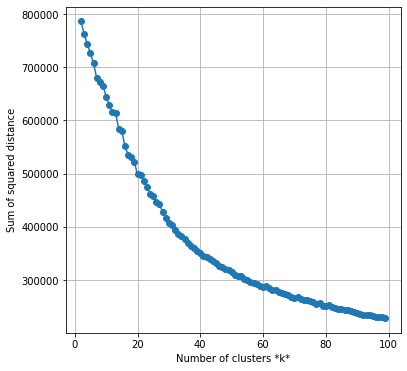

In [8]:
#find the best K 
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(2,100))
cluster_map = pd.DataFrame()
cluster_map['data_index'] = range(0,X.shape[0])

for k in list_k:
    km = KMeans(n_clusters=k, max_iter =1000)
    km.fit(X)
    sse.append(km.inertia_)
    
    cluster_map['cluster_{}'.format(k)] = km.labels_
    print(cluster_map.groupby('cluster_{}'.format(k)).count())
    print("---------------------------------------")

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.grid(True)


In [ ]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
        curr_center = centroids[pred_clusters[i]]
        curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
    return sse
sse= calculate_WSS(X,20)

In [ ]:
plt.plot(sse)

In [ ]:
def selecet_index_base_kmeans(X,k,min_member):
    '''
    X: np.array
    k: number of k in kmeans
    min_member: number of sample should take out of each cluster
    '''
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

    cluster_map = pd.DataFrame()
    cluster_map['data_index'] = range(0,X.shape[0])
    cluster_map['cluster'] = kmeans.labels_

    selected_index=[]
    for i in range(k):
        l = cluster_map[cluster_map.cluster == i].index
        if len(l)<=min_member:
            selected_index = list(l)+ list(selected_index)
        else:
            sampling = random.choices(l, k=min_member)
            selected_index = list(selected_index) + list(sampling)
        l=[]
    
    return selected_index
    
selected_index = selecet_index_base_kmeans(X,k=4,min_member=51)  
print(len(selected_index))

In [ ]:
trial3_basedkmeasn = temp.specialindex_trial_builder(trial_3,selected_index)
print(len(trial3_basedkmeasn.trials))

In [ ]:
#save the result
pickle.dump(good_trial, open('/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/trials/4000in_new.p', 'wb'))

# investigate results

#### check the accuracy of each cluster 

In [ ]:
trial_3.trials[0]['result']['loss']

In [ ]:
kmeans4 = KMeans(n_clusters=8, random_state=0).fit(X)
cluster_kmeans4 = pd.DataFrame()
cluster_kmeans4['data_index'] = range(0,X.shape[0])
cluster_kmeans4['cluster'] = kmeans4.labels_
cluster_kmeans4['acc'] = range(0,X.shape[0])
acc=[]
for index, eachtrial in enumerate(trial_3.trials):
    if index ==22105:
        break
    acc.append(abs(eachtrial['result']['loss']))

print(len(acc))
cluster_kmeans4['acc'] = acc
cluster_kmeans4.head()   

In [ ]:
sse[0]

In [ ]:
for i in range(8):
    l = cluster_kmeans4[cluster_kmeans4.cluster == i]
    l_index = cluster_kmeans4[cluster_kmeans4.cluster == i].index
    print(l['acc'].mean())
    print(len(l_index))
    print("%%%%%%%%")

In [ ]:
cluster_kmeans4['acc'].mean()

In [ ]:
len(np.where(0 == cluster_kmeans4[cluster_kmeans4['acc']<0.5]['cluster'])[0])

In [ ]:
cluster_kmeans4['acc'][1556]

In [ ]:
kmeans4.labels_

In [ ]:
good_trial = temp.find_n_initial(trial=trial_3,N=4000,good=15,bad=3987)

In [ ]:
good_loss=good_trial.losses()
losses = [abs(i) for i in good_loss]

In [ ]:
all_loss=trial_3.losses()
all_losses = [abs(i) for i in all_loss]

In [ ]:
len(all_losses)

### histogram the best History sofar 

In [ ]:

counts, edges, plot = plt.hist(all_losses, bins=5)
plt.xlabel('Accuracy')
plt.ylabel('N - points')
plt.grid(True)

plt.show()

In [ ]:
percentage=[]
for number in counts:
    percentage.append((number/21249)*100)
percentage

In [ ]:
counts

In [ ]:
edges

In [ ]:
losses = np.array(losses)

In [ ]:
def select_points(a):
    a=np.array(a)
    print(a.mean())
    

In [ ]:
from scipy import stats
stats.binned_statistic(losses, statistic=select_points, bins=5, values=losses)

In [ ]:
X.shape

In [ ]:
np.array(good_trial.losses()).mean()

In [ ]:
X = temp.vector_builder(good_trial)
X = np.array(good_trial)
print(X.shape)

In [ ]:
X.mean()

In [ ]:
X.std()

In [ ]:
0.47778473091364204

In [ ]:
good_trial.trials[290]

In [ ]:
for i,xx in enumerate(X):
    if(xx[0]==0.47778473091364204):
        print(i)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.

In [ ]:
X.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X = StandardScaler().fit_transform(X)

principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['component1', 'component2'])
a = principalDf.values



In [ ]:
fig, ax = plt.subplots()
ax.scatter(a[:,0],a[:,1])

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = principalDf['component1']
xline = principalDf['component2']
yline = principalDf['component3']
ax.plot3D(xline, yline, zline, 'gray')

# Clustering 

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 8

dendegram = sch.dendrogram(sch.linkage(X,method='ward'))

In [ ]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [ ]:
y_hc = hc.fit_predict(X)

In [ ]:
y_hc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline  

In [ ]:
som = somoclu.Somoclu(80,4000, data=X)
%time som.train()

In [ ]:
som.view_component_planes()

In [ ]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal
    

In [ ]:
k, gapdf = optimalK(X, nrefs=10, maxClusters=10)
print ('Optimal k is: ', k)

# Find the best K

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt



# estimate number of clusters with the gap statistic
from what_the_cluster.GapStat import GapStat
gs = GapStat(clusterer='kmeans',  # an arbitrary clustering algorithm can be provided
         cluster_sizes=range(1, 10),
         ref_dist='uniform',  # either 'uniform' or 'svd'
         B=10)  # number of samples from the reference null distribution

gs.fit(X)
gs.plot_wcss_curves()
gs.plot_gap()

### Silhouette Scores

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

all_sil_coeff =[]
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    all_sil_coeff.append(sil_coeff)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
plt.plot(all_sil_coeff)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture as GMM
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 8

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [ ]:
embeddings = X

In [ ]:
n_clusters=np.arange(2, 10)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(embeddings) 
        labels=gmm.predict(embeddings)
        sil=metrics.silhouette_score(embeddings, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

In [ ]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

### BIC Scores

In [ ]:
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GMM(n, n_init=2).fit(embeddings) 
        
        tmp_bic.append(gmm.bic(embeddings))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

In [ ]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

### find the nearst point to centroid in kmeasn 

### DBSCAN

In [ ]:


# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
print(n_clusters_)

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = range(0,X.shape[0])
cluster_map['cluster'] = db.labels_

In [ ]:
list(set(cluster_map['cluster']))

In [ ]:
types = cluster_map.groupby('cluster').count()
print(list(types))



In [ ]:
def selecet_index_base_DBSCAN(X,min_member):
    '''
    X: np.array
    k: number of k in kmeans
    min_member: number of sample should take out of each cluster
    '''
    # Compute DBSCAN
    db = DBSCAN(eps=0.3, min_samples=min_member).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_


    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    print ("Number of Cluster is {}".format(print(n_clusters_)))


    cluster_map = pd.DataFrame()
    cluster_map['data_index'] = range(0,X.shape[0])
    cluster_map['cluster'] = db.labels_

    selected_index=[]
    for i in list(set(cluster_map['cluster'])):
        l = cluster_map[cluster_map.cluster == i].index
        if len(l)<=min_member:
            selected_index = list(l)+ list(selected_index)
        else:
            sampling = random.choices(l, k=min_member)
            selected_index = list(selected_index) + list(sampling)
        l=[]
    
    return selected_index
    
selected_index = selecet_index_base_DBSCAN(X,min_member=10)  
print(len(selected_index))

In [ ]:
trial3_basedDBSACN = temp.specialindex_trial_builder(trial_3,selected_index)
print(len(trial3_basedDBSACN.trials))

#save the result
pickle.dump(trial3_basedDBSACN, open('/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/trials/trial3_940in_basedDBSACN_k=93.p', 'wb'))


# Compare results 

In [ ]:
dataset_3 = 79.84
dataset_3_history = 83.99 #21249 history 

dataset_3_kmeansopenml_history = 71.90 #153 history 
dataset_3_153_random = 77.49 #5 times run

dataset_3_kmeanshyperopt_history =81.74 # 240 history
dataset_3_240random = 75.39 #5 times run 

dataframe = {'Dataset':[3],
             'Null_History':[dataset_3],
             'With_full_History':[dataset_3_history],
             'kmeans_openml_History':[dataset_3_kmeansopenml_history],
             'kmeans_openml_random':[dataset_3_153_random],
             'kmeans_hyperopt_History':[dataset_3_kmeanshyperopt_history],
             'kmeans_hyperopt_random':[dataset_3_240random]
             
            }

dataframe_1 = pd.DataFrame(dataframe)

dataframe_2 = pd.melt(dataframe_1, id_vars="Dataset", var_name="Approaches", value_name="Avg_Accuracies")
dataframe_2.head()

sns.set(font_scale=1.5,style='whitegrid')
# sns.set_context("talk",font_scale=1.4,rc={'figure.figsize':(11.7,15)} )

g= sns.catplot(x='Dataset', y='Avg_Accuracies', hue='Approaches', data=dataframe_2, kind='bar',aspect=2)
g.set(ylim=(60,95))

## Find the best epsilon for DBscan 

In [ ]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

# print(distances)
# print(indices)
plt.plot(distances)

In [ ]:
aa = distances[np.where(np.sort(distances)<25)]
plt.plot(aa)

In [ ]:
kmeans = KMeans(n_clusters=1, random_state=0).fit(X)

In [ ]:
center_a = kmeans.cluster_centers_

In [ ]:
import heapq
s = [20, 15, 27, 30]
heapq.nsmallest(2,[i for i, k in enumerate(s)])

In [ ]:
distance_a=[]
for row in X:
    distance_a.append(scipy.spatial.distance.euclidean(center_a, row))
np.argsort(distance_a)[:N]

In [ ]:
np.argsort(distance_a)

In [ ]:

A = np.array([1, 7, 9, 2, 0.1, 17, 17, 1.5])
np.argsort(A)[:3]


In [ ]:

def cluster_DBSCAN(X_1,min_member=20):
    '''
    X: np.array
    k: number of k in kmeans
    min_member: number of sample should take out of each cluster
    '''
    # Compute DBSCAN
    db = DBSCAN(eps=50, min_samples=min_member).fit(X_1)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_


    # Number of clusters in labels, ignoring noise if present.
    #n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    #keep the outlier
    n_clusters_ = len(set(labels))
    n_noise_ = list(labels).count(-1)
   
    print ("N cluster is {}".format(n_clusters_))
    return n_clusters_



def objective(args):
    a,b,c,d,e = args
    
    print(a,b,c,d,e)
    print("-------------")
    N_a = int(a * 86)
    N_b = int(b * 139)
    N_c = int(c * 2519)
    N_d = int(d * 522)
    N_e = int(e * 17983)
    
    list_a = list(np.where((X[:,0]>0) & (X[:,0]<0.2))[0])
    list_b = list(np.where((X[:,0]>0.2) & (X[:,0]<0.4))[0])
    list_c = list(np.where((X[:,0]>0.4) & (X[:,0]<0.6))[0])
    list_d = list(np.where((X[:,0]>0.6) & (X[:,0]<0.8))[0])
    list_e = list(np.where((X[:,0]>0.8) & (X[:,0]<0.999))[0])
    
#     print(len(list_a),len(list_b),len(list_c),len(list_d),len(list_e))
    
    random.seed(0)


    def sampling1(list_a,N_a):      
        X_a= X[list_a,:]
        kmeans_a = KMeans(n_clusters=1, random_state=0).fit(X_a)
        center_a = kmeans_a.cluster_centers_
        distance_a=[]
        for rows in X_a:
            distance_a.append(scipy.spatial.distance.euclidean(center_a, rows))
        sampling_a = np.argsort(distance_a)[:N_a]
        return sampling_a
    
    sampling_a = sampling1(list_a,min(N_a,len(list_a)))
    sampling_b = sampling1(list_b,min(N_b,len(list_b)))
    sampling_c = sampling1(list_c,min(N_c,len(list_c)))
    sampling_d = sampling1(list_d,min(N_d,len(list_d)))
    sampling_e = sampling1(list_e,min(N_e,len(list_e)))
    
    
    sampling_all = list(sampling_a)+list(sampling_b)+list(sampling_c)+list(sampling_d)+list(sampling_e)

    
    new_x = X[sampling_all,:]
    
    print(new_x.shape)
    
    n_cluster = cluster_DBSCAN(new_x)
    
    Deduction = n_cluster/len(sampling_all)
    
    print("Deduction is {}".format(Deduction))
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    
    
    return {'loss': -Deduction, 'status': STATUS_OK,'index':sampling_all }


space  = [hp.uniform('a',0,1),
         hp.uniform('b',0,1),
         hp.uniform('c',0,1),
         hp.uniform('d',0,1),
         hp.uniform('e',0,1)]


trial = Trials()


best,trials_new = fmin(objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trial,
    rstate=np.random.RandomState(10),)

print(best)
best_indexes = trials_new.best_trial['result']['index']

In [ ]:
len(best_indexes)

In [ ]:
trial_base_maxkasr = temp.sepecialindex_trial_builder(trial_3,best_indexes)
pickle.dump(trial_base_maxkasr, open('/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/trials/trial_base_maxkasr1049.p','wb'))


In [ ]:
import vector

In [ ]:
for iteration in list(np.arange(2000,11000,2000)):
    trials_1 = vector.trial_builder_kmeans(trial_3,num_clusters=iteration)
    print(trials_1.trials)

In [ ]:

cluster_map = pd.DataFrame()
cluster_map['data_index'] = []

cluster_map.loc[0,'data_index'] = 0

cluster_map.head()


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris['feature_names'])


sse = []
list_k = list(range(2,10))
cluster_map = pd.DataFrame()
cluster_map['data_index'] = range(0,X.shape[0])

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
    cluster_map['cluster_{}'.format(k)] = km.labels_
#     print(cluster_map.groupby('cluster_{}'.format(k)).count())
#     print("---------------------------------------")

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.grid(True)
print(sse)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
X = StandardScaler().fit_transform(X)

sse = []
list_k = list(range(2,10))
cluster_map = pd.DataFrame()
cluster_map['data_index'] = range(0,X.shape[0])

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
    cluster_map['cluster_{}'.format(k)] = km.labels_
#     print(cluster_map.groupby('cluster_{}'.format(k)).count())
#     print("---------------------------------------")

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.grid(True)
print(sse)

In [ ]:
withoutscaling = [152.34795176035792, 78.85144142614601, 57.228473214285714, 46.44618205128205, 41.704424470266574, 34.40900974025974, 30.01588095238096, 27.894012189564823]
scaling = [222.36170496502308, 140.0327527742865, 114.30480331856761, 90.80759161913358, 81.72775255799205, 71.81371300822669, 62.647183903468985, 54.29894572818739]

for x,y in zip(withoutscaling,scaling):
    print(x/y)


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target


# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
X = StandardScaler().fit_transform(X)
y = iris.target



# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
XX = iris.data
# XX = StandardScaler().fit_transform(XX)
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)


X_reduced = PCA(n_components=2).fit_transform(XX)

ax.scatter(X_reduced[:,0],X_reduced[:,1])


plt.show()

In [ ]:
a= np.array([[None,2,None],[3,4,None],[None,None,None]])
df = pd.DataFrame(a)
df

In [ ]:
df = df.dropna(axis='columns',how='all')
df


In [ ]:
print(df.count())

In [ ]:
for row in X:
    if None in X:
        print(row)

In [ ]:
np.where(a[:,:]==np.nan)

In [ ]:
for col in df.columns:
    df[col].fillna(df[col].mean(),inplace=True)


df

In [ ]:
df.head()

In [ ]:
np.nan == None

In [ ]:
# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= None, strategy='mean')
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [ ]:
d={'A':2,'V':3}

In [ ]:
if 'a'in [str(i).lower() for i in d.keys()]:
    print('true')

In [ ]:
# 1.1575415510478908
trial_128 = pickle.load(open("/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/trials/trial128_k=8.p", "rb"))

trial_128.trials[18]['misc']['vals']['decisiontreeclassifier__max_depth'] =[0.5]

In [ ]:
#save the result
pickle.dump(trial_128, open('/home/dfki/Desktop/Thesis/hyperopt/result_openml/mylaptop/3/automatic/new/trials/trial128_k=8.p', 'wb'))

In [ ]:
trial_3.trials[1230]['misc']['vals']

In [ ]:
for i in range (21945):
    for k,v in trial_3.trials[i]['misc']['vals'].items():
        if len(v) !=0:
            if type(v[0]) ==str:
                print(i)
    

In [ ]:
selected_index = range(0,1225)

In [ ]:
trial3_basedkmeasn = temp.specialindex_trial_builder(trial_3,selected_index)

In [ ]:

#save the result
pickle.dump(trial3_basedkmeasn, open('/home/dfki/Desktop/Thesis/openml_test/pickel_files/3/trial_3_new1.p', 'wb'))
